In [1]:
import os

os.listdir()

['.ipynb_checkpoints',
 'grades.csv',
 'logs.csv',
 'unseen_grades.csv',
 'Untitled.ipynb',
 '__MACOSX']

In [2]:
import pandas as pd

In [3]:
df_1 = pd.read_csv("grades.csv")

df_2 = pd.read_csv("logs.csv")
df_2["Time"] = df_2["Time"].apply(lambda k:pd.to_datetime(k))

df_3 = pd.read_csv("unseen_grades.csv")

In [4]:
df_2

,StudentId,Time,Type,Action
0,72af,"28/05/23, 10:51",User report,Grade user report viewed
1,72af,"28/05/23, 10:51",System,Course viewed
2,c426,"27/05/23, 15:53",System,Course viewed
3,0326,"26/05/23, 22:22",System,Course viewed
4,8b7a,"26/05/23, 21:52",System,Course viewed
...,...,...,...,...
83202,e2e7,"12/09/22, 21:30",System,Course viewed
83203,e2e7,"12/09/22, 21:17",URL,Course module viewed
83204,e2e7,"12/09/22, 21:16",System,Course viewed
83205,e2e7,"12/09/22, 21:16",System,Course viewed


In [77]:
df_2['Action'].value_counts()

Course viewed                                     25951
Course module viewed                              21103
Quiz attempt viewed                               16861
Video resource viewed                              5150
List Submissions                                   2841
Quiz attempt reviewed                              2463
Quiz attempt started                               1258
User graded                                        1256
Quiz attempt submitted                             1249
Discussion viewed                                  1155
Quiz attempt summary viewed                        1064
Grade user report viewed                            699
Add Submission                                      424
Scheduler booking form viewed                       245
User profile viewed                                 214
Course user report viewed                           197
User list viewed                                    183
Course activity completion updated              

In [85]:
df_1.shape

(107, 2)

In [70]:
selected_actions = df_2['Action'].value_counts().index[:11]
selected_actions

Index(['Course viewed', 'Course module viewed', 'Quiz attempt viewed',
       'Video resource viewed', 'List Submissions', 'Quiz attempt reviewed',
       'Quiz attempt started', 'User graded', 'Quiz attempt submitted',
       'Discussion viewed', 'Quiz attempt summary viewed'],
      dtype='object')

In [ ]:
df_2['Action'].value_counts()>1000


In [7]:
df_1

,StudentId,Grade
0,8de3,2nd
1,d969,2nd
2,6d29,1st
3,1dd9,1st
4,f63c,1st
...,...,...
102,9673,3rd
103,5867,3rd
104,8976,2nd
105,56fe,Fail


In [12]:
df_2.groupby("StudentId").first()

,Time,Type,Action
StudentId,,,
0126,"12/04/23, 12:52",Quiz,Course module viewed
0139,"12/04/23, 13:03",Quiz,Course module viewed
020c,"1/05/23, 20:10",Quiz,Course module viewed
026e,"19/04/23, 20:50",Kaltura Video Resource,Video resource viewed
0326,"26/05/23, 22:22",System,Course viewed
...,...,...,...
f63c,"12/04/23, 13:02",Quiz,Course module viewed
fb47,"17/04/23, 14:28",System,Course viewed
fc66,"19/04/23, 09:52",URL,Course module viewed


In [25]:
df_2["Year"] = df_2["Time"].apply(lambda k: k.year)
df_2["Month"] = df_2["Time"].apply(lambda k: k.month)
df_2["Day"] = df_2["Time"].apply(lambda k: k.day)

In [32]:
df_2["Month"].value_counts()

11    16052
2     14245
3     13092
10     9379
12     8754
1      8118
8      3976
9      3268
5      2296
7      1686
4      1671
6       670
Name: Month, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

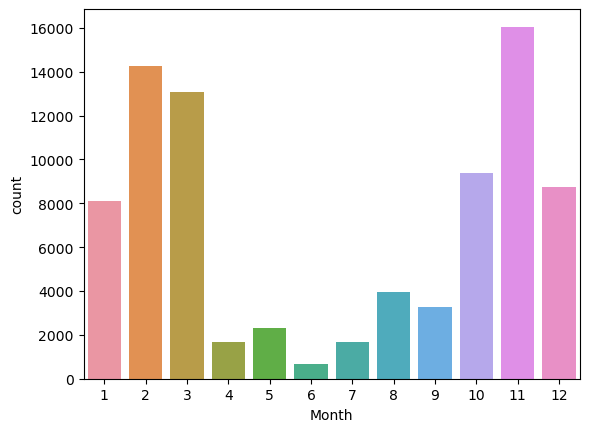

In [34]:
import seaborn as sns
sns.countplot(data=df_2, x="Month")

In [38]:
df_info = df_2.groupby("StudentId").count()["Time"]
df_info

In [39]:
df_info

StudentId
0126     126
0139     215
020c     813
026e     400
0326    1565
        ... 
f63c     146
fb47     240
fc66     149
fd73     675
fe9a     880
Name: Time, Length: 115, dtype: int64

In [67]:
df_2["Action"]
df_2['Action'].value_counts().index[:11].to_list()

['Course viewed',
 'Course module viewed',
 'Quiz attempt viewed',
 'Video resource viewed',
 'List Submissions',
 'Quiz attempt reviewed',
 'Quiz attempt started',
 'User graded',
 'Quiz attempt submitted',
 'Discussion viewed',
 'Quiz attempt summary viewed']

In [78]:
df_att = df_2[df_2['Action'].isin(selected_actions)]
df_att

,StudentId,Time,Type,Action,Year,Month,Day
1,72af,2023-05-28 10:51:00,System,Course viewed,2023,5,28
2,c426,2023-05-27 15:53:00,System,Course viewed,2023,5,27
3,0326,2023-05-26 22:22:00,System,Course viewed,2023,5,26
4,8b7a,2023-05-26 21:52:00,System,Course viewed,2023,5,26
6,8b7a,2023-05-26 21:52:00,System,Course viewed,2023,5,26
...,...,...,...,...,...,...,...
83202,e2e7,2022-12-09 21:30:00,System,Course viewed,2022,12,9
83203,e2e7,2022-12-09 21:17:00,URL,Course module viewed,2022,12,9
83204,e2e7,2022-12-09 21:16:00,System,Course viewed,2022,12,9
83205,e2e7,2022-12-09 21:16:00,System,Course viewed,2022,12,9


In [79]:
df_att.groupby("StudentId")

In [110]:
all_actions = df_2.groupby(['StudentId', 'Action']).size().unstack().reset_index()
all_actions = all_actions.rename_axis(None, axis=1)

all_actions = all_actions.merge(df_1, on='StudentId', how='left')
all_actions = all_actions.dropna(subset=['Grade'])

all_actions = all_actions.fillna(0)
all_actions

,StudentId,A file has been uploaded.,A submission has been submitted.,Add Submission,Calendar event created,Calendar event deleted,Course activity completion updated,Course module instance list viewed,Course module viewed,Course searched,...,The status of the submission has been updated.,The status of the submission has been viewed.,Tour ended,Tour started,User graded,User list viewed,User profile viewed,Video resource viewed,Zip archive of folder downloaded,Grade
0,0126,0.0,0.0,2.0,0.0,0.0,0.0,0.0,22.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2nd
1,0139,0.0,0.0,2.0,0.0,0.0,0.0,0.0,51.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,7.0,3rd
2,020c,0.0,0.0,2.0,0.0,0.0,2.0,0.0,252.0,0.0,...,0.0,0.0,0.0,0.0,8.0,6.0,4.0,105.0,0.0,Fail
3,026e,0.0,0.0,4.0,0.0,0.0,3.0,0.0,103.0,0.0,...,0.0,0.0,1.0,2.0,3.0,1.0,0.0,37.0,1.0,3rd
4,0326,1.0,1.0,6.0,0.0,0.0,9.0,0.0,461.0,0.0,...,0.0,4.0,1.0,1.0,19.0,12.0,8.0,66.0,2.0,1st
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,f63c,0.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1st
111,fb47,0.0,0.0,2.0,0.0,0.0,0.0,0.0,44.0,0.0,...,0.0,0.0,1.0,1.0,3.0,0.0,0.0,8.0,0.0,1st
112,fc66,0.0,0.0,2.0,0.0,0.0,0.0,0.0,17.0,0.0,...,0.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,2nd
113,fd73,0.0,0.0,2.0,0.0,0.0,1.0,0.0,176.0,0.0,...,0.0,0.0,1.0,1.0,15.0,2.0,0.0,18.0,0.0,Fail


In [86]:
action_counts = df_att.groupby(['StudentId', 'Action']).size().unstack().reset_index()
action_counts = action_counts.rename_axis(None, axis=1)
action_counts

,StudentId,Course module viewed,Course viewed,Discussion viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed
0,0126,22.0,27.0,NaN,2.0,NaN,3.0,3.0,4.0,60.0,3.0,NaN
1,0139,51.0,62.0,NaN,8.0,NaN,3.0,3.0,5.0,68.0,3.0,1.0
2,020c,252.0,251.0,27.0,9.0,8.0,9.0,8.0,1.0,110.0,8.0,105.0
3,026e,103.0,148.0,2.0,23.0,NaN,3.0,3.0,2.0,62.0,3.0,37.0
4,0326,461.0,543.0,6.0,102.0,46.0,19.0,18.0,20.0,188.0,19.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...
110,f63c,10.0,24.0,NaN,3.0,NaN,3.0,3.0,NaN,98.0,3.0,NaN
111,fb47,44.0,67.0,NaN,8.0,NaN,3.0,3.0,NaN,97.0,3.0,8.0
112,fc66,17.0,32.0,NaN,8.0,NaN,3.0,3.0,2.0,76.0,3.0,2.0
113,fd73,176.0,169.0,2.0,9.0,27.0,15.0,15.0,11.0,198.0,15.0,18.0


In [90]:
selected_actions = action_counts.merge(df_1, on='StudentId', how='left')
selected_actions = selected_actions.dropna(subset=['Grade'])
selected_actions

,StudentId,Course module viewed,Course viewed,Discussion viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed,Grade
0,0126,22.0,27.0,NaN,2.0,NaN,3.0,3.0,4.0,60.0,3.0,NaN,2nd
1,0139,51.0,62.0,NaN,8.0,NaN,3.0,3.0,5.0,68.0,3.0,1.0,3rd
2,020c,252.0,251.0,27.0,9.0,8.0,9.0,8.0,1.0,110.0,8.0,105.0,Fail
3,026e,103.0,148.0,2.0,23.0,NaN,3.0,3.0,2.0,62.0,3.0,37.0,3rd
4,0326,461.0,543.0,6.0,102.0,46.0,19.0,18.0,20.0,188.0,19.0,66.0,1st
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,f63c,10.0,24.0,NaN,3.0,NaN,3.0,3.0,NaN,98.0,3.0,NaN,1st
111,fb47,44.0,67.0,NaN,8.0,NaN,3.0,3.0,NaN,97.0,3.0,8.0,1st
112,fc66,17.0,32.0,NaN,8.0,NaN,3.0,3.0,2.0,76.0,3.0,2.0,2nd
113,fd73,176.0,169.0,2.0,9.0,27.0,15.0,15.0,11.0,198.0,15.0,18.0,Fail


In [92]:
selected_actions.isnull().sum()

StudentId                       0
Course module viewed            0
Course viewed                   0
Discussion viewed              32
List Submissions                1
Quiz attempt reviewed          39
Quiz attempt started            0
Quiz attempt submitted          0
Quiz attempt summary viewed     9
Quiz attempt viewed             0
User graded                     0
Video resource viewed          10
Grade                           0
dtype: int64

In [95]:
selected_actions = selected_actions.fillna(0)
selected_actions

,StudentId,Course module viewed,Course viewed,Discussion viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed,Grade
0,0126,22.0,27.0,0.0,2.0,0.0,3.0,3.0,4.0,60.0,3.0,0.0,2nd
1,0139,51.0,62.0,0.0,8.0,0.0,3.0,3.0,5.0,68.0,3.0,1.0,3rd
2,020c,252.0,251.0,27.0,9.0,8.0,9.0,8.0,1.0,110.0,8.0,105.0,Fail
3,026e,103.0,148.0,2.0,23.0,0.0,3.0,3.0,2.0,62.0,3.0,37.0,3rd
4,0326,461.0,543.0,6.0,102.0,46.0,19.0,18.0,20.0,188.0,19.0,66.0,1st
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,f63c,10.0,24.0,0.0,3.0,0.0,3.0,3.0,0.0,98.0,3.0,0.0,1st
111,fb47,44.0,67.0,0.0,8.0,0.0,3.0,3.0,0.0,97.0,3.0,8.0,1st
112,fc66,17.0,32.0,0.0,8.0,0.0,3.0,3.0,2.0,76.0,3.0,2.0,2nd
113,fd73,176.0,169.0,2.0,9.0,27.0,15.0,15.0,11.0,198.0,15.0,18.0,Fail


# Model_poor


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [101]:
Y = selected_actions['Grade']
X = selected_actions.drop(['StudentId', 'Grade'], axis=1)

In [102]:
Y

0       2nd
1       3rd
2      Fail
3       3rd
4       1st
       ... 
110     1st
111     1st
112     2nd
113    Fail
114     3rd
Name: Grade, Length: 107, dtype: object

In [103]:
X

,Course module viewed,Course viewed,Discussion viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed
0,22.0,27.0,0.0,2.0,0.0,3.0,3.0,4.0,60.0,3.0,0.0
1,51.0,62.0,0.0,8.0,0.0,3.0,3.0,5.0,68.0,3.0,1.0
2,252.0,251.0,27.0,9.0,8.0,9.0,8.0,1.0,110.0,8.0,105.0
3,103.0,148.0,2.0,23.0,0.0,3.0,3.0,2.0,62.0,3.0,37.0
4,461.0,543.0,6.0,102.0,46.0,19.0,18.0,20.0,188.0,19.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...
110,10.0,24.0,0.0,3.0,0.0,3.0,3.0,0.0,98.0,3.0,0.0
111,44.0,67.0,0.0,8.0,0.0,3.0,3.0,0.0,97.0,3.0,8.0
112,17.0,32.0,0.0,8.0,0.0,3.0,3.0,2.0,76.0,3.0,2.0
113,176.0,169.0,2.0,9.0,27.0,15.0,15.0,11.0,198.0,15.0,18.0


In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=31)
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
Y_pred = model.predict(X_test)
Y_pred

array(['Fail', '1st', '3rd', '3rd', '2nd', 'Fail', '2nd', '3rd', '1st',
       '2nd', '2nd', 'Fail', 'Fail', '3rd', '2nd', '1st', '2nd', '2nd',
       '3rd', '1st', '3rd', '1st'], dtype=object)

In [106]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.36363636363636365

# Model Select Attributes

In [119]:
from sklearn.feature_selection import SelectKBest, chi2
Y = all_actions['Grade']
X = all_actions.drop(['StudentId', 'Grade'], axis=1)

In [120]:
X

,A file has been uploaded.,A submission has been submitted.,Add Submission,Calendar event created,Calendar event deleted,Course activity completion updated,Course module instance list viewed,Course module viewed,Course searched,Course user report viewed,...,Submission updated.,The status of the submission has been updated.,The status of the submission has been viewed.,Tour ended,Tour started,User graded,User list viewed,User profile viewed,Video resource viewed,Zip archive of folder downloaded
0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,51.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,7.0
2,0.0,0.0,2.0,0.0,0.0,2.0,0.0,252.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,8.0,6.0,4.0,105.0,0.0
3,0.0,0.0,4.0,0.0,0.0,3.0,0.0,103.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,37.0,1.0
4,1.0,1.0,6.0,0.0,0.0,9.0,0.0,461.0,0.0,14.0,...,0.0,0.0,4.0,1.0,1.0,19.0,12.0,8.0,66.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
111,0.0,0.0,2.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,8.0,0.0
112,0.0,0.0,2.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0
113,0.0,0.0,2.0,0.0,0.0,1.0,0.0,176.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,15.0,2.0,0.0,18.0,0.0


In [121]:
Y

0       2nd
1       3rd
2      Fail
3       3rd
4       1st
       ... 
110     1st
111     1st
112     2nd
113    Fail
114     3rd
Name: Grade, Length: 107, dtype: object

In [157]:
n = 40
selector = SelectKBest(score_func=chi2, k=n)
selector

SelectKBest(k=40, score_func=<function chi2 at 0x0000012A02359900>)

In [186]:
X_new = selector.fit_transform(X, Y)
X_new

array([[  0.,   0.,   2., ...,   0.,   0.,   0.],
       [  0.,   0.,   2., ...,   0.,   1.,   7.],
       [  0.,   0.,   2., ...,   4., 105.,   0.],
       ...,
       [  0.,   0.,   2., ...,   0.,   2.,   0.],
       [  0.,   0.,   2., ...,   0.,  18.,   0.],
       [  0.,   0.,   4., ...,   7.,   9.,   3.]])

In [159]:
selected_indices = selector.get_support(indices=True)
selected_indices


array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 35, 36, 39,
       41, 42, 43, 44, 45, 46], dtype=int64)

In [160]:
selected_features = X.columns[selected_indices]
selected_features

Index(['A file has been uploaded.', 'A submission has been submitted.',
       'Add Submission', 'Calendar event created', 'Calendar event deleted',
       'Course activity completion updated', 'Course module viewed',
       'Course searched', 'Course user report viewed', 'Course viewed',
       'Discussion created', 'Discussion subscription created',
       'Discussion subscription deleted', 'Discussion viewed',
       'Grade overview report viewed', 'Grade user report viewed',
       'Individual Responses report viewed', 'List Submissions',
       'Open Grader viewed', 'Post created', 'Post updated',
       'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Recent activity viewed',
       'Scheduler booking added', 'Scheduler booking form viewed',
       'Scheduler booking removed', 'Some content has been posted.',
       'Submission created.', 'Submission form viewed.',
       'The status of

In [161]:
X[selected_features]

,A file has been uploaded.,A submission has been submitted.,Add Submission,Calendar event created,Calendar event deleted,Course activity completion updated,Course module viewed,Course searched,Course user report viewed,Course viewed,...,Some content has been posted.,Submission created.,Submission form viewed.,The status of the submission has been viewed.,Tour started,User graded,User list viewed,User profile viewed,Video resource viewed,Zip archive of folder downloaded
0,0.0,0.0,2.0,0.0,0.0,0.0,22.0,0.0,0.0,27.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,51.0,0.0,0.0,62.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,7.0
2,0.0,0.0,2.0,0.0,0.0,2.0,252.0,0.0,2.0,251.0,...,0.0,0.0,0.0,0.0,0.0,8.0,6.0,4.0,105.0,0.0
3,0.0,0.0,4.0,0.0,0.0,3.0,103.0,0.0,0.0,148.0,...,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,37.0,1.0
4,1.0,1.0,6.0,0.0,0.0,9.0,461.0,0.0,14.0,543.0,...,0.0,1.0,1.0,4.0,1.0,19.0,12.0,8.0,66.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.0,0.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
111,0.0,0.0,2.0,0.0,0.0,0.0,44.0,0.0,0.0,67.0,...,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,8.0,0.0
112,0.0,0.0,2.0,0.0,0.0,0.0,17.0,0.0,0.0,32.0,...,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0,0.0
113,0.0,0.0,2.0,0.0,0.0,1.0,176.0,0.0,0.0,169.0,...,0.0,0.0,0.0,0.0,1.0,15.0,2.0,0.0,18.0,0.0


In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.2, random_state=31)

In [163]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.45454545454545453

In [166]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [180]:
range(X.shape[-1])

range(0, 47)

In [191]:
# Set the range of values for n (number of selected features) and k (number of folds)
n_values = [10, 11, 12, 13, 14, 15]  # Number of features to select
k = 5  # Number of folds

acc_dict = {}

required_att = []
max_acc = 0
max_num_att = 0
logit_model = 0

# Iterate over each value of n
for n in range(1, X.shape[1] + 1):
    # Instantiate the SelectKBest class
    selector = SelectKBest(score_func=chi2, k=n)

    # Fit the selector to the data and transform the feature matrix
    X_new = selector.fit_transform(X, Y)

    # Get the selected feature indices
    selected_indices = selector.get_support(indices=True)

    # Retrieve the names of the selected features
    selected_features = X.columns[selected_indices]

    # Print the selected feature names
    print("Selected features for n =", n, ":", selected_features)

    # Instantiate a logistic regression model
    model = LogisticRegression()

    # Perform k-fold cross-validation
    scores = cross_val_score(model, X_new, Y, cv=k, scoring='accuracy')

    # Calculate the mean accuracy across folds
    mean_accuracy = scores.mean()

    # Print the mean accuracy
    print("Mean Accuracy for n =", n, ":", mean_accuracy)
    print()
    
    acc_dict[n] = mean_accuracy
    
    if mean_accuracy > max_acc:
        max_acc = mean_accuracy
        max_num_att = n
        required_att = selected_features
        logit_model = model

Selected features for n = 1 : Index(['Course viewed'], dtype='object')
Mean Accuracy for n = 1 : 0.3467532467532467

Selected features for n = 2 : Index(['Course module viewed', 'Course viewed'], dtype='object')
Mean Accuracy for n = 2 : 0.3082251082251082

Selected features for n = 3 : Index(['Course module viewed', 'Course viewed', 'Quiz attempt reviewed'], dtype='object')
Mean Accuracy for n = 3 : 0.34415584415584416

Selected features for n = 4 : Index(['Course module viewed', 'Course viewed', 'List Submissions',
       'Quiz attempt reviewed'],
      dtype='object')


C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 4 : 0.35497835497835495

Selected features for n = 5 : Index(['Course module viewed', 'Course viewed', 'List Submissions',
       'Quiz attempt reviewed', 'Quiz attempt viewed'],
      dtype='object')
Mean Accuracy for n = 5 : 0.3558441558441558

Selected features for n = 6 : Index(['Course module viewed', 'Course viewed', 'List Submissions',
       'Quiz attempt reviewed', 'Quiz attempt viewed',
       'Video resource viewed'],
      dtype='object')
Mean Accuracy for n = 6 : 0.4207792207792208

Selected features for n = 7 : Index(['Course module viewed', 'Course viewed', 'List Submissions',
       'Quiz attempt reviewed', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Video resource viewed'],
      dtype='object')


C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 7 : 0.4103896103896104

Selected features for n = 8 : Index(['Course module viewed', 'Course viewed', 'List Submissions',
       'Quiz attempt reviewed', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Video resource viewed',
       'Zip archive of folder downloaded'],
      dtype='object')
Mean Accuracy for n = 8 : 0.38354978354978353

Selected features for n = 9 : Index(['Course module viewed', 'Course user report viewed', 'Course viewed',
       'List Submissions', 'Quiz attempt reviewed',
       'Quiz attempt summary viewed', 'Quiz attempt viewed',
       'Video resource viewed', 'Zip archive of folder downloaded'],
      dtype='object')
Mean Accuracy for n = 9 : 0.383982683982684

Selected features for n = 10 : Index(['Course module viewed', 'Course user report viewed', 'Course viewed',
       'List Submissions', 'Quiz attempt reviewed', 'Quiz attempt submitted',
       'Quiz attempt summary viewed', 'Quiz attempt viewed',
       'Video resource

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 10 : 0.4025974025974026

Selected features for n = 11 : Index(['Course module viewed', 'Course user report viewed', 'Course viewed',
       'List Submissions', 'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Video resource viewed',
       'Zip archive of folder downloaded'],
      dtype='object')
Mean Accuracy for n = 11 : 0.42987012987012985

Selected features for n = 12 : Index(['Course module viewed', 'Course user report viewed', 'Course viewed',
       'List Submissions', 'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'User graded', 'Video resource viewed',
       'Zip archive of folder downloaded'],
      dtype='object')
Mean Accuracy for n = 12 : 0.4666666666666666

Selected features for n = 13 : Index(['Course module viewed', 'Course user report viewed', 'Course viewed

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 13 : 0.3922077922077922

Selected features for n = 14 : Index(['Course module viewed', 'Course user report viewed', 'Course viewed',
       'Grade user report viewed', 'List Submissions', 'Quiz attempt reviewed',
       'Quiz attempt started', 'Quiz attempt submitted',
       'Quiz attempt summary viewed', 'Quiz attempt viewed', 'User graded',
       'User list viewed', 'Video resource viewed',
       'Zip archive of folder downloaded'],
      dtype='object')
Mean Accuracy for n = 14 : 0.3831168831168831

Selected features for n = 15 : Index(['Course activity completion updated', 'Course module viewed',
       'Course user report viewed', 'Course viewed',
       'Grade user report viewed', 'List Submissions', 'Quiz attempt reviewed',
       'Quiz attempt started', 'Quiz attempt submitted',
       'Quiz attempt summary viewed', 'Quiz attempt viewed', 'User graded',
       'User list viewed', 'Video resource viewed',
       'Zip archive of folder downloaded'],
     

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 15 : 0.42987012987012985

Selected features for n = 16 : Index(['Course activity completion updated', 'Course module viewed',
       'Course user report viewed', 'Course viewed',
       'Grade user report viewed', 'List Submissions', 'Quiz attempt reviewed',
       'Quiz attempt started', 'Quiz attempt submitted',
       'Quiz attempt summary viewed', 'Quiz attempt viewed',
       'The status of the submission has been viewed.', 'User graded',
       'User list viewed', 'Video resource viewed',
       'Zip archive of folder downloaded'],
      dtype='object')
Mean Accuracy for n = 16 : 0.4207792207792208

Selected features for n = 17 : Index(['Course activity completion updated', 'Course module viewed',
       'Course user report viewed', 'Course viewed',
       'Grade user report viewed', 'List Submissions', 'Quiz attempt reviewed',
       'Quiz attempt started', 'Quiz attempt submitted',
       'Quiz attempt summary viewed', 'Quiz attempt viewed',
       'Schedu

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 18 : 0.4021645021645021

Selected features for n = 19 : Index(['Course activity completion updated', 'Course module viewed',
       'Course user report viewed', 'Course viewed', 'Discussion viewed',
       'Grade user report viewed', 'List Submissions', 'Open Grader viewed',
       'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Scheduler booking form viewed',
       'The status of the submission has been viewed.', 'User graded',
       'User list viewed', 'Video resource viewed',
       'Zip archive of folder downloaded'],
      dtype='object')
Mean Accuracy for n = 19 : 0.4199134199134199

Selected features for n = 20 : Index(['Course activity completion updated', 'Course module viewed',
       'Course searched', 'Course user report viewed', 'Course viewed',
       'Discussion viewed', 'Grade user report viewed', 'List Submissions',
       'Open Grader viewed', 'Quiz 

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 21 : 0.3831168831168831

Selected features for n = 22 : Index(['Add Submission', 'Course activity completion updated',
       'Course module viewed', 'Course searched', 'Course user report viewed',
       'Course viewed', 'Discussion viewed', 'Grade user report viewed',
       'List Submissions', 'Open Grader viewed', 'Quiz attempt reviewed',
       'Quiz attempt started', 'Quiz attempt submitted',
       'Quiz attempt summary viewed', 'Quiz attempt viewed',
       'Scheduler booking form viewed', 'Submission form viewed.',
       'The status of the submission has been viewed.', 'User graded',
       'User list viewed', 'Video resource viewed',
       'Zip archive of folder downloaded'],
      dtype='object')
Mean Accuracy for n = 22 : 0.37316017316017314

Selected features for n = 23 : Index(['Add Submission', 'Course activity completion updated',
       'Course module viewed', 'Course searched', 'Course user report viewed',
       'Course viewed', 'Discussion vi

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 24 : 0.4021645021645021

Selected features for n = 25 : Index(['Add Submission', 'Course activity completion updated',
       'Course module viewed', 'Course searched', 'Course user report viewed',
       'Course viewed', 'Discussion viewed', 'Grade user report viewed',
       'Individual Responses report viewed', 'List Submissions',
       'Open Grader viewed', 'Post created', 'Quiz attempt reviewed',
       'Quiz attempt started', 'Quiz attempt submitted',
       'Quiz attempt summary viewed', 'Quiz attempt viewed',
       'Recent activity viewed', 'Scheduler booking form viewed',
       'Submission form viewed.',
       'The status of the submission has been viewed.', 'User graded',
       'User list viewed', 'Video resource viewed',
       'Zip archive of folder downloaded'],
      dtype='object')
Mean Accuracy for n = 25 : 0.38311688311688313

Selected features for n = 26 : Index(['Add Submission', 'Course activity completion updated',
       'Course module v

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 27 : 0.3922077922077922

Selected features for n = 28 : Index(['A submission has been submitted.', 'Add Submission',
       'Course activity completion updated', 'Course module viewed',
       'Course searched', 'Course user report viewed', 'Course viewed',
       'Discussion viewed', 'Grade overview report viewed',
       'Grade user report viewed', 'Individual Responses report viewed',
       'List Submissions', 'Open Grader viewed', 'Post created',
       'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Recent activity viewed',
       'Scheduler booking form viewed', 'Submission created.',
       'Submission form viewed.',
       'The status of the submission has been viewed.', 'User graded',
       'User list viewed', 'Video resource viewed',
       'Zip archive of folder downloaded'],
      dtype='object')
Mean Accuracy for n = 28 : 0.3554112554112554

Selected feat

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 30 : 0.33679653679653676

Selected features for n = 31 : Index(['A file has been uploaded.', 'A submission has been submitted.',
       'Add Submission', 'Course activity completion updated',
       'Course module viewed', 'Course searched', 'Course user report viewed',
       'Course viewed', 'Discussion viewed', 'Grade overview report viewed',
       'Grade user report viewed', 'Individual Responses report viewed',
       'List Submissions', 'Open Grader viewed', 'Post created',
       'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Recent activity viewed',
       'Scheduler booking added', 'Scheduler booking form viewed',
       'Submission created.', 'Submission form viewed.',
       'The status of the submission has been viewed.', 'User graded',
       'User list viewed', 'User profile viewed', 'Video resource viewed',
       'Zip archive of folder downloaded'],
  

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Selected features for n = 33 : Index(['A file has been uploaded.', 'A submission has been submitted.',
       'Add Submission', 'Calendar event created',
       'Course activity completion updated', 'Course module viewed',
       'Course searched', 'Course user report viewed', 'Course viewed',
       'Discussion viewed', 'Grade overview report viewed',
       'Grade user report viewed', 'Individual Responses report viewed',
       'List Submissions', 'Open Grader viewed', 'Post created',
       'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Recent activity viewed',
       'Scheduler booking added', 'Scheduler booking form viewed',
       'Some content has been posted.', 'Submission created.',
       'Submission form viewed.',
       'The status of the submission has been viewed.', 'User graded',
       'User list viewed', 'User profile viewed', 'Video resource viewed',
       'Zip archive o

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 35 : 0.36406926406926404

Selected features for n = 36 : Index(['A file has been uploaded.', 'A submission has been submitted.',
       'Add Submission', 'Calendar event created',
       'Course activity completion updated', 'Course module viewed',
       'Course searched', 'Course user report viewed', 'Course viewed',
       'Discussion subscription created', 'Discussion subscription deleted',
       'Discussion viewed', 'Grade overview report viewed',
       'Grade user report viewed', 'Individual Responses report viewed',
       'List Submissions', 'Open Grader viewed', 'Post created',
       'Post updated', 'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Recent activity viewed',
       'Scheduler booking added', 'Scheduler booking form viewed',
       'Some content has been posted.', 'Submission created.',
       'Submission form viewed.',
       'The status of the 

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 38 : 0.36406926406926404

Selected features for n = 39 : Index(['A file has been uploaded.', 'A submission has been submitted.',
       'Add Submission', 'Calendar event created',
       'Course activity completion updated', 'Course module viewed',
       'Course searched', 'Course user report viewed', 'Course viewed',
       'Discussion created', 'Discussion subscription created',
       'Discussion subscription deleted', 'Discussion viewed',
       'Grade overview report viewed', 'Grade user report viewed',
       'Individual Responses report viewed', 'List Submissions',
       'Open Grader viewed', 'Post created', 'Post updated',
       'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Recent activity viewed',
       'Scheduler booking added', 'Scheduler booking form viewed',
       'Scheduler booking removed', 'Some content has been posted.',
       'Submission create

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 41 : 0.34588744588744585

Selected features for n = 42 : Index(['A file has been uploaded.', 'A submission has been submitted.',
       'Add Submission', 'Calendar event created', 'Calendar event deleted',
       'Course activity completion updated',
       'Course module instance list viewed', 'Course module viewed',
       'Course searched', 'Course user report viewed', 'Course viewed',
       'Discussion created', 'Discussion subscription created',
       'Discussion subscription deleted', 'Discussion viewed',
       'Grade overview report viewed', 'Grade user report viewed',
       'Individual Responses report viewed', 'List Submissions',
       'Open Grader viewed', 'Post created', 'Post updated',
       'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Recent activity viewed',
       'Scheduler booking added', 'Scheduler booking form viewed',
       'Scheduler booki

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Mean Accuracy for n = 44 : 0.3922077922077922

Selected features for n = 45 : Index(['A file has been uploaded.', 'A submission has been submitted.',
       'Add Submission', 'Calendar event created', 'Calendar event deleted',
       'Course activity completion updated',
       'Course module instance list viewed', 'Course module viewed',
       'Course searched', 'Course user report viewed', 'Course viewed',
       'Discussion created', 'Discussion subscription created',
       'Discussion subscription deleted', 'Discussion viewed',
       'Grade overview report viewed', 'Grade user report viewed',
       'Individual Responses report viewed', 'List Submissions',
       'Open Grader viewed', 'Post created', 'Post updated',
       'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Recent activity viewed',
       'Remove submission confirmation viewed.', 'Scheduler booking added',
       'Schedul

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [188]:
acc_dict

{1: 0.3467532467532467,
 2: 0.3082251082251082,
 3: 0.34415584415584416,
 4: 0.35497835497835495,
 5: 0.3558441558441558,
 6: 0.4207792207792208,
 7: 0.4103896103896104,
 8: 0.38354978354978353,
 9: 0.383982683982684,
 10: 0.4025974025974026,
 11: 0.42987012987012985,
 12: 0.4666666666666666,
 13: 0.3922077922077922,
 14: 0.3831168831168831,
 15: 0.42987012987012985,
 16: 0.4207792207792208,
 17: 0.4017316017316017,
 18: 0.4021645021645021,
 19: 0.4199134199134199,
 20: 0.4112554112554112,
 21: 0.3831168831168831,
 22: 0.37316017316017314,
 23: 0.39220779220779217,
 24: 0.4021645021645021,
 25: 0.38311688311688313,
 26: 0.37402597402597404,
 27: 0.3922077922077922,
 28: 0.3554112554112554,
 29: 0.4103896103896104,
 30: 0.33679653679653676,
 31: 0.3744588744588745,
 32: 0.364935064935065,
 33: 0.34545454545454546,
 34: 0.345021645021645,
 35: 0.36406926406926404,
 36: 0.38311688311688313,
 37: 0.37402597402597404,
 38: 0.36406926406926404,
 39: 0.383982683982684,
 40: 0.3831168831168831

In [189]:
required_att

Index(['Course module viewed', 'Course user report viewed', 'Course viewed',
       'List Submissions', 'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'User graded', 'Video resource viewed',
       'Zip archive of folder downloaded'],
      dtype='object')

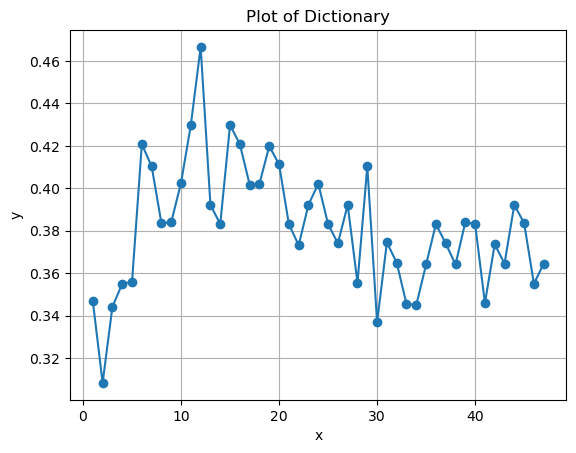

In [185]:
import matplotlib.pyplot as plt
x = list(acc_dict.keys())
y = list(acc_dict.values())

plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Dictionary')
plt.grid(True)
plt.show()

# 12

In [190]:
max_num_att

12

In [193]:
logit_model

LogisticRegression()

In [198]:
all_actions.columns

Index(['StudentId', 'A file has been uploaded.',
       'A submission has been submitted.', 'Add Submission',
       'Calendar event created', 'Calendar event deleted',
       'Course activity completion updated',
       'Course module instance list viewed', 'Course module viewed',
       'Course searched', 'Course user report viewed', 'Course viewed',
       'Discussion created', 'Discussion subscription created',
       'Discussion subscription deleted', 'Discussion viewed',
       'Grade overview report viewed', 'Grade user report viewed',
       'Individual Responses report viewed', 'List Submissions',
       'Open Grader viewed', 'Post created', 'Post updated',
       'Quiz attempt reviewed', 'Quiz attempt started',
       'Quiz attempt submitted', 'Quiz attempt summary viewed',
       'Quiz attempt viewed', 'Recent activity viewed',
       'Remove submission confirmation viewed.', 'Responses submitted',
       'Scheduler booking added', 'Scheduler booking form viewed',
       'Sc

In [227]:
model_logist_att = required_att.to_list()
model_logist_att.extend(["StudentId", "Grade"])
model_logist_att

['Course module viewed',
 'Course user report viewed',
 'Course viewed',
 'List Submissions',
 'Quiz attempt reviewed',
 'Quiz attempt started',
 'Quiz attempt submitted',
 'Quiz attempt summary viewed',
 'Quiz attempt viewed',
 'User graded',
 'Video resource viewed',
 'Zip archive of folder downloaded',
 'StudentId',
 'Grade']

In [219]:
best_logit_action = all_actions[model_logist_att]
best_logit_action

,Course module viewed,Course user report viewed,Course viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed,Zip archive of folder downloaded,StudentId,Grade
0,22.0,0.0,27.0,2.0,0.0,3.0,3.0,4.0,60.0,3.0,0.0,0.0,0126,2nd
1,51.0,0.0,62.0,8.0,0.0,3.0,3.0,5.0,68.0,3.0,1.0,7.0,0139,3rd
2,252.0,2.0,251.0,9.0,8.0,9.0,8.0,1.0,110.0,8.0,105.0,0.0,020c,Fail
3,103.0,0.0,148.0,23.0,0.0,3.0,3.0,2.0,62.0,3.0,37.0,1.0,026e,3rd
4,461.0,14.0,543.0,102.0,46.0,19.0,18.0,20.0,188.0,19.0,66.0,2.0,0326,1st
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10.0,0.0,24.0,3.0,0.0,3.0,3.0,0.0,98.0,3.0,0.0,0.0,f63c,1st
111,44.0,0.0,67.0,8.0,0.0,3.0,3.0,0.0,97.0,3.0,8.0,0.0,fb47,1st
112,17.0,0.0,32.0,8.0,0.0,3.0,3.0,2.0,76.0,3.0,2.0,0.0,fc66,2nd
113,176.0,0.0,169.0,9.0,27.0,15.0,15.0,11.0,198.0,15.0,18.0,0.0,fd73,Fail


In [229]:
model_logist_att

['Course module viewed',
 'Course user report viewed',
 'Course viewed',
 'List Submissions',
 'Quiz attempt reviewed',
 'Quiz attempt started',
 'Quiz attempt submitted',
 'Quiz attempt summary viewed',
 'Quiz attempt viewed',
 'User graded',
 'Video resource viewed',
 'Zip archive of folder downloaded',
 'StudentId',
 'Grade']

In [232]:
action_counts.merge(df_1, on='StudentId', how='left')

,StudentId,Course module viewed,Course viewed,Discussion viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed,Grade
0,0126,22.0,27.0,NaN,2.0,NaN,3.0,3.0,4.0,60.0,3.0,NaN,2nd
1,0139,51.0,62.0,NaN,8.0,NaN,3.0,3.0,5.0,68.0,3.0,1.0,3rd
2,020c,252.0,251.0,27.0,9.0,8.0,9.0,8.0,1.0,110.0,8.0,105.0,Fail
3,026e,103.0,148.0,2.0,23.0,NaN,3.0,3.0,2.0,62.0,3.0,37.0,3rd
4,0326,461.0,543.0,6.0,102.0,46.0,19.0,18.0,20.0,188.0,19.0,66.0,1st
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,f63c,10.0,24.0,NaN,3.0,NaN,3.0,3.0,NaN,98.0,3.0,NaN,1st
111,fb47,44.0,67.0,NaN,8.0,NaN,3.0,3.0,NaN,97.0,3.0,8.0,1st
112,fc66,17.0,32.0,NaN,8.0,NaN,3.0,3.0,2.0,76.0,3.0,2.0,2nd
113,fd73,176.0,169.0,2.0,9.0,27.0,15.0,15.0,11.0,198.0,15.0,18.0,Fail


In [238]:
best_logit_action = df_2.groupby(['StudentId', 'Action']).size().unstack().reset_index()
best_logit_action = best_logit_action.rename_axis(None, axis=1)

best_logit_action = best_logit_action.merge(df_1, on='StudentId', how='left')
best_logit_action = best_logit_action[model_logist_att]

best_logit_action

,Course module viewed,Course user report viewed,Course viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed,Zip archive of folder downloaded,StudentId,Grade
0,22.0,NaN,27.0,2.0,NaN,3.0,3.0,4.0,60.0,3.0,NaN,NaN,0126,2nd
1,51.0,NaN,62.0,8.0,NaN,3.0,3.0,5.0,68.0,3.0,1.0,7.0,0139,3rd
2,252.0,2.0,251.0,9.0,8.0,9.0,8.0,1.0,110.0,8.0,105.0,NaN,020c,Fail
3,103.0,NaN,148.0,23.0,NaN,3.0,3.0,2.0,62.0,3.0,37.0,1.0,026e,3rd
4,461.0,14.0,543.0,102.0,46.0,19.0,18.0,20.0,188.0,19.0,66.0,2.0,0326,1st
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10.0,NaN,24.0,3.0,NaN,3.0,3.0,NaN,98.0,3.0,NaN,NaN,f63c,1st
111,44.0,NaN,67.0,8.0,NaN,3.0,3.0,NaN,97.0,3.0,8.0,NaN,fb47,1st
112,17.0,NaN,32.0,8.0,NaN,3.0,3.0,2.0,76.0,3.0,2.0,NaN,fc66,2nd
113,176.0,NaN,169.0,9.0,27.0,15.0,15.0,11.0,198.0,15.0,18.0,NaN,fd73,Fail


In [242]:
null_grade_rows = best_logit_action[best_logit_action['Grade'].isnull()]
null_grade_rows

,Course module viewed,Course user report viewed,Course viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed,Zip archive of folder downloaded,StudentId,Grade
21,432.0,11.0,769.0,60.0,51.0,19.0,19.0,14.0,166.0,19.0,250.0,NaN,37dc,NaN
50,369.0,NaN,385.0,20.0,57.0,19.0,19.0,19.0,186.0,19.0,97.0,NaN,72d1,NaN
70,256.0,14.0,380.0,8.0,28.0,17.0,17.0,13.0,171.0,17.0,131.0,7.0,a7cd,NaN
76,187.0,NaN,121.0,11.0,12.0,10.0,10.0,10.0,175.0,10.0,18.0,NaN,b0af,NaN
82,50.0,4.0,138.0,76.0,NaN,3.0,3.0,1.0,76.0,3.0,8.0,NaN,c426,NaN
88,170.0,NaN,190.0,40.0,12.0,13.0,13.0,13.0,180.0,13.0,5.0,NaN,cad7,NaN
104,281.0,NaN,435.0,17.0,26.0,10.0,10.0,6.0,85.0,10.0,141.0,1.0,e744,NaN
107,324.0,6.0,368.0,11.0,43.0,19.0,19.0,9.0,223.0,19.0,100.0,1.0,f21b,NaN


In [243]:
non_null = best_logit_action[~best_logit_action['Grade'].isnull()]

In [258]:
null_grade_rows.drop(["StudentId", "Grade"], axis=1).fillna(0)

,Course module viewed,Course user report viewed,Course viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed,Zip archive of folder downloaded
21,432.0,11.0,769.0,60.0,51.0,19.0,19.0,14.0,166.0,19.0,250.0,0.0
50,369.0,0.0,385.0,20.0,57.0,19.0,19.0,19.0,186.0,19.0,97.0,0.0
70,256.0,14.0,380.0,8.0,28.0,17.0,17.0,13.0,171.0,17.0,131.0,7.0
76,187.0,0.0,121.0,11.0,12.0,10.0,10.0,10.0,175.0,10.0,18.0,0.0
82,50.0,4.0,138.0,76.0,0.0,3.0,3.0,1.0,76.0,3.0,8.0,0.0
88,170.0,0.0,190.0,40.0,12.0,13.0,13.0,13.0,180.0,13.0,5.0,0.0
104,281.0,0.0,435.0,17.0,26.0,10.0,10.0,6.0,85.0,10.0,141.0,1.0
107,324.0,6.0,368.0,11.0,43.0,19.0,19.0,9.0,223.0,19.0,100.0,1.0


In [245]:
non_null

,Course module viewed,Course user report viewed,Course viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed,Zip archive of folder downloaded,StudentId,Grade
0,22.0,NaN,27.0,2.0,NaN,3.0,3.0,4.0,60.0,3.0,NaN,NaN,0126,2nd
1,51.0,NaN,62.0,8.0,NaN,3.0,3.0,5.0,68.0,3.0,1.0,7.0,0139,3rd
2,252.0,2.0,251.0,9.0,8.0,9.0,8.0,1.0,110.0,8.0,105.0,NaN,020c,Fail
3,103.0,NaN,148.0,23.0,NaN,3.0,3.0,2.0,62.0,3.0,37.0,1.0,026e,3rd
4,461.0,14.0,543.0,102.0,46.0,19.0,18.0,20.0,188.0,19.0,66.0,2.0,0326,1st
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10.0,NaN,24.0,3.0,NaN,3.0,3.0,NaN,98.0,3.0,NaN,NaN,f63c,1st
111,44.0,NaN,67.0,8.0,NaN,3.0,3.0,NaN,97.0,3.0,8.0,NaN,fb47,1st
112,17.0,NaN,32.0,8.0,NaN,3.0,3.0,2.0,76.0,3.0,2.0,NaN,fc66,2nd
113,176.0,NaN,169.0,9.0,27.0,15.0,15.0,11.0,198.0,15.0,18.0,NaN,fd73,Fail


In [247]:
X = non_null.drop(["StudentId", 'Grade'], axis=1)
y = non_null['Grade']

In [254]:
X = X.fillna(0)
X

,Course module viewed,Course user report viewed,Course viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed,Zip archive of folder downloaded
0,22.0,0.0,27.0,2.0,0.0,3.0,3.0,4.0,60.0,3.0,0.0,0.0
1,51.0,0.0,62.0,8.0,0.0,3.0,3.0,5.0,68.0,3.0,1.0,7.0
2,252.0,2.0,251.0,9.0,8.0,9.0,8.0,1.0,110.0,8.0,105.0,0.0
3,103.0,0.0,148.0,23.0,0.0,3.0,3.0,2.0,62.0,3.0,37.0,1.0
4,461.0,14.0,543.0,102.0,46.0,19.0,18.0,20.0,188.0,19.0,66.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
110,10.0,0.0,24.0,3.0,0.0,3.0,3.0,0.0,98.0,3.0,0.0,0.0
111,44.0,0.0,67.0,8.0,0.0,3.0,3.0,0.0,97.0,3.0,8.0,0.0
112,17.0,0.0,32.0,8.0,0.0,3.0,3.0,2.0,76.0,3.0,2.0,0.0
113,176.0,0.0,169.0,9.0,27.0,15.0,15.0,11.0,198.0,15.0,18.0,0.0


In [251]:
y

0       2nd
1       3rd
2      Fail
3       3rd
4       1st
       ... 
110     1st
111     1st
112     2nd
113    Fail
114     3rd
Name: Grade, Length: 107, dtype: object

In [262]:
non_null

,Course module viewed,Course user report viewed,Course viewed,List Submissions,Quiz attempt reviewed,Quiz attempt started,Quiz attempt submitted,Quiz attempt summary viewed,Quiz attempt viewed,User graded,Video resource viewed,Zip archive of folder downloaded,StudentId,Grade
0,22.0,NaN,27.0,2.0,NaN,3.0,3.0,4.0,60.0,3.0,NaN,NaN,0126,2nd
1,51.0,NaN,62.0,8.0,NaN,3.0,3.0,5.0,68.0,3.0,1.0,7.0,0139,3rd
2,252.0,2.0,251.0,9.0,8.0,9.0,8.0,1.0,110.0,8.0,105.0,NaN,020c,Fail
3,103.0,NaN,148.0,23.0,NaN,3.0,3.0,2.0,62.0,3.0,37.0,1.0,026e,3rd
4,461.0,14.0,543.0,102.0,46.0,19.0,18.0,20.0,188.0,19.0,66.0,2.0,0326,1st
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10.0,NaN,24.0,3.0,NaN,3.0,3.0,NaN,98.0,3.0,NaN,NaN,f63c,1st
111,44.0,NaN,67.0,8.0,NaN,3.0,3.0,NaN,97.0,3.0,8.0,NaN,fb47,1st
112,17.0,NaN,32.0,8.0,NaN,3.0,3.0,2.0,76.0,3.0,2.0,NaN,fc66,2nd
113,176.0,NaN,169.0,9.0,27.0,15.0,15.0,11.0,198.0,15.0,18.0,NaN,fd73,Fail


In [265]:
non_null = non_null.fillna(0)
Y = non_null['Grade']
X = non_null.drop(["StudentId",'Grade'], axis=1)

In [269]:
logit_model.fit(X,Y)

result = logit_model.predict(null_grade_rows.drop(["StudentId", "Grade"], axis=1).fillna(0))
result

C:\Users\Usman\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array(['3rd', 'Fail', '3rd', '2nd', '1st', '3rd', '3rd', 'Fail'],
      dtype=object)

In [271]:
pd.Series(result)

0     3rd
1    Fail
2     3rd
3     2nd
4     1st
5     3rd
6     3rd
7    Fail
dtype: object

In [273]:
sub = null_grade_rows[["StudentId", "Grade"]]
sub.loc[:, "Grade"] = pd.Series(result)
sub

C:\Users\Usman\AppData\Local\Temp\ipykernel_81620\878915238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[:, "Grade"] = pd.Series(result)


,StudentId,Grade
21,37dc,NaN
50,72d1,NaN
70,a7cd,NaN
76,b0af,NaN
82,c426,NaN
88,cad7,NaN
104,e744,NaN
107,f21b,NaN


In [276]:
sub.loc[:, "Grade"] = result

C:\Users\Usman\AppData\Local\Temp\ipykernel_81620\3486834380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[:, "Grade"] = result


In [277]:
sub

,StudentId,Grade
21,37dc,3rd
50,72d1,Fail
70,a7cd,3rd
76,b0af,2nd
82,c426,1st
88,cad7,3rd
104,e744,3rd
107,f21b,Fail


In [278]:
sub.to_csv("grade_result.csv", index=False)